In [1]:
import math
import time
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
#%matplotlib notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
corr_features = ['DENSITY, g/cm3', 'RDEEP, ohm.m', 'DTC, us/ft', 'DTS, US/F', 'GR, gAPI', 'NEUTRON, CFCF',
                 'NMR_FF, v/v', 'NMR_TPOR, v/v', 'NMR_BW, v/v', 'NMR_CBW, v/v']

df = pd.read_csv('norphlet_scaled.csv', encoding='utf8')
print(df.shape)
df[corr_features].isna().sum()

(15956, 23)


DENSITY, g/cm3     373
RDEEP, ohm.m        21
DTC, us/ft         619
DTS, US/F          750
GR, gAPI            92
NEUTRON, CFCF      419
NMR_FF, v/v       1562
NMR_TPOR, v/v     1562
NMR_BW, v/v       1562
NMR_CBW, v/v      1562
dtype: int64

In [3]:
df = df.dropna(subset=corr_features)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(14273, 23)


,Well name,Field,Field part,"MD, ft","DENSITY, g/cm3","DTC, us/ft","DTS, US/F","FLD, unitless","GR, gAPI","NEUTRON, CFCF","NMR_BW, v/v","NMR_CBW, v/v","NMR_FF, v/v","NMR_TPOR, v/v","RDEEP, ohm.m","TVD, ft","TVDBML, ft","TVDSS, ft",Filename,wellName_old,datasetName,"RMEDIUM, ohm.m","RSHALLOW, ohm.m"
0,MC348-3ST1,Appomattox,NE,25654.00,11.810724,-3.282618,-3.292020,2.0,-1.185375,-0.406330,-2.059905,0.044636,-3.042459,-4.929566,0.041163,25215.80,17884.80,25140.80,MC348-3ST1 Appomattox NE_LQC.csv,MC348-3ST1 Appomattox NE,LQC,3.532304,NaN
1,MC348-3ST1,Appomattox,NE,25654.25,11.862163,-3.241252,-3.266110,2.0,-1.671831,-1.135766,-2.043275,1.172220,-3.029381,-4.618738,0.175006,25216.02,17885.02,25141.02,MC348-3ST1 Appomattox NE_LQC.csv,MC348-3ST1 Appomattox NE,LQC,3.514227,NaN
2,MC348-3ST1,Appomattox,NE,25654.50,11.349167,-3.199886,-3.239986,2.0,-2.028623,-1.625015,-2.032059,0.885594,-3.025518,-4.679422,0.446352,25216.24,17885.24,25141.24,MC348-3ST1 Appomattox NE_LQC.csv,MC348-3ST1 Appomattox NE,LQC,3.135936,NaN
3,MC348-3ST1,Appomattox,NE,25654.75,10.406590,-3.159990,-3.175953,2.0,-2.196745,-2.041383,-1.981783,0.161935,-2.994211,-4.793384,0.761145,25216.46,17885.46,25141.46,MC348-3ST1 Appomattox NE_LQC.csv,MC348-3ST1 Appomattox NE,LQC,2.886046,NaN
4,MC348-3ST1,Appomattox,NE,25655.00,9.138699,-3.120095,-3.110656,2.0,-2.467159,-2.384871,-1.728851,0.387073,-2.818953,-4.369072,1.031585,25216.68,17885.68,25141.68,MC348-3ST1 Appomattox NE_LQC.csv,MC348-3ST1 Appomattox NE,LQC,2.768231,NaN


In [30]:
df.describe()

,"MD, ft","DENSITY, g/cm3","DTC, us/ft","DTS, US/F","FLD, unitless","GR, gAPI","NEUTRON, CFCF","NMR_BW, v/v","NMR_CBW, v/v","NMR_FF, v/v","NMR_TPOR, v/v","RDEEP, ohm.m","TVD, ft","TVDBML, ft","TVDSS, ft","RMEDIUM, ohm.m","RSHALLOW, ohm.m",clusters
count,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14273.000000,14249.000000,14273.000000,14273.000000,3899.000000,7330.000000,14273.000000
mean,26173.766896,-0.022398,0.001225,-0.022841,1.876900,0.025742,0.028404,0.002826,0.000560,0.008940,0.012836,0.100787,25589.165267,18219.939894,25510.567524,0.214976,0.126556,3.226021
std,956.401021,1.007819,1.012984,0.968161,0.328563,0.957693,0.976030,0.995591,0.998798,0.991054,0.972585,0.920596,1140.328829,1110.746860,1130.774351,0.936918,0.907833,2.371337
min,24515.500000,-2.621274,-4.298291,-3.529837,1.000000,-3.403203,-3.987679,-2.059905,-0.918352,-3.049558,-4.929566,-2.070083,24398.360000,16949.040000,24320.040000,-1.627036,-1.859988,0.000000
25%,25596.250000,-0.704033,-0.656559,-0.717600,2.000000,-0.589945,-0.484635,-0.667653,-0.786357,-0.713955,-0.606574,-0.539085,24880.450000,17507.640000,24804.350000,-0.360079,-0.633166,1.000000
50%,25947.750000,-0.035498,-0.032157,0.005880,2.000000,-0.032862,0.161452,-0.214857,-0.318528,0.070548,-0.006126,0.216097,25253.000000,17931.910000,25181.750000,0.158531,0.305354,3.000000
75%,26404.386719,0.567362,0.714034,0.614659,2.000000,0.572857,0.723809,0.412138,0.460872,0.759817,0.702076,0.744695,25658.360000,18350.490000,25590.100000,0.907637,0.794921,5.000000
max,28694.603041,11.862163,2.499990,2.694533,2.000000,13.273762,2.980867,4.163663,6.432404,2.778312,2.832126,2.239605,28661.040176,21187.040176,28559.040176,3.532304,2.019214,7.000000


In [4]:
print('Data points per well after removing missing values:')
for well in df['Well name'].unique():
    print('\t{}: {} datapoints'.format(well, df[df['Well name'] == well].shape[0]))

Data points per well after removing missing values:
	MC348-3ST1: 551 datapoints
	MC391-1: 2713 datapoints
	MC392-1: 950 datapoints
	MC392-1ST1: 3032 datapoints
	MC393-1: 3679 datapoints
	MC525-2: 1173 datapoints
	MC612-1BP1: 2175 datapoints


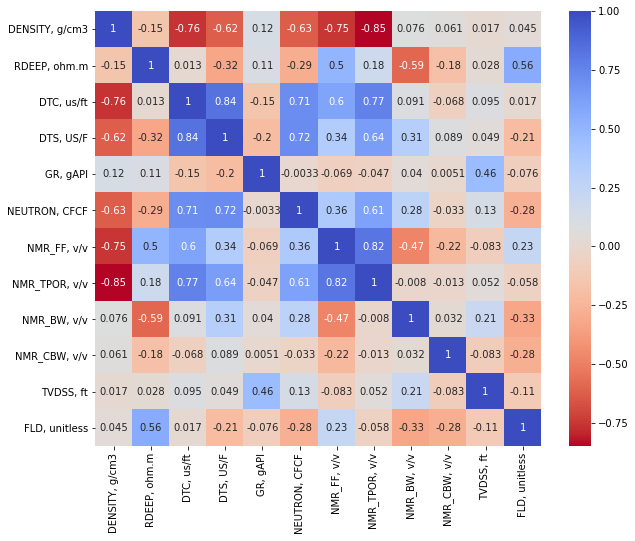

In [5]:
plt.figure(figsize=(10,8))
c = df[corr_features + ['TVDSS, ft', 'FLD, unitless']].corr(method ='spearman')    #pearson, kendall, spearman
sns.heatmap(c, cmap='coolwarm_r', annot=True)

In [6]:
df_2d = deepcopy(df)
df_2d['wells'] = pd.Categorical(df_2d['Well name']).codes
df_pca = df_2d[corr_features]
pca = PCA(0.9)
transformed = pca.fit_transform(df_pca)
pca09_result = pd.DataFrame(transformed)
print(pca09_result.shape)
print('Explained variance:', pca.explained_variance_ratio_)
#print(pca.singular_values_)

(14273, 5)
Explained variance: [0.4458477  0.2328017  0.09862013 0.09425758 0.04115211]


Explained variance: 0.6786494050264252


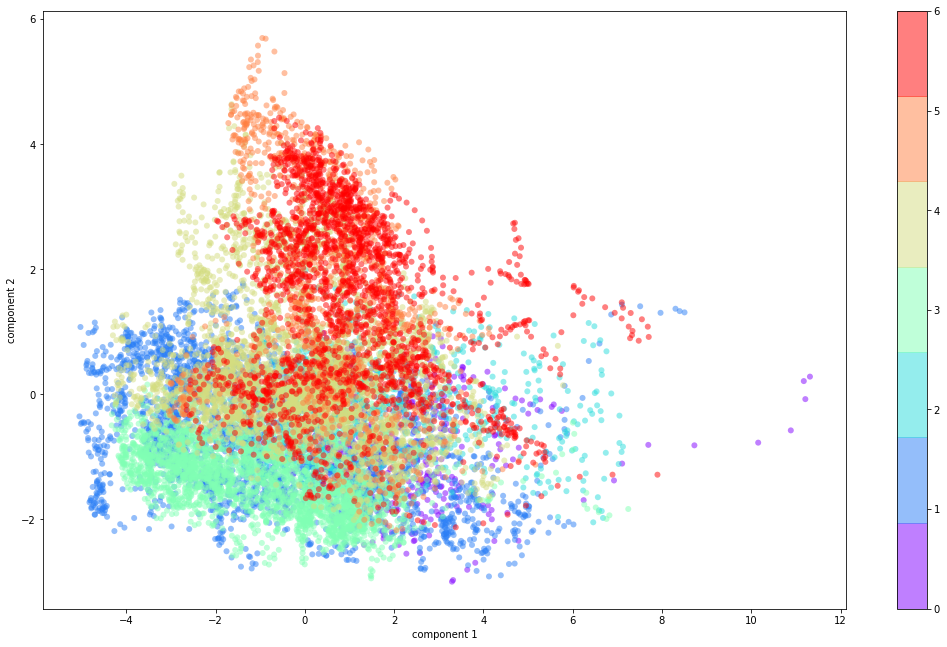

In [7]:
# plot features in 2D by well - not really useful, just as an example
pca_2 = PCA(2)
projected = pca_2.fit_transform(df_pca)
print('Explained variance:', sum(pca_2.explained_variance_ratio_))

plt.figure(figsize=(18,11))
plt.scatter(projected[:, 0], projected[:, 1], c=df_2d['wells'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 7))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [8]:
df_2d, df_pca = None, None

In [9]:
print('Min depth:', df['TVDSS, ft'].min())
print('Max depth:', df['TVDSS, ft'].max())
print('Difference:', math.ceil(df['TVDSS, ft'].max() - df['TVDSS, ft'].min()))

Min depth: 24320.04
Max depth: 28559.0401761094
Difference: 4240


In [12]:
# zero duplicates
df[df[corr_features].duplicated()]

,Well name,Field,Field part,"MD, ft","DENSITY, g/cm3","DTC, us/ft","DTS, US/F","FLD, unitless","GR, gAPI","NEUTRON, CFCF","NMR_BW, v/v","NMR_CBW, v/v","NMR_FF, v/v","NMR_TPOR, v/v","RDEEP, ohm.m","TVD, ft","TVDBML, ft","TVDSS, ft",Filename,wellName_old,datasetName,"RMEDIUM, ohm.m","RSHALLOW, ohm.m",depth_bin


In [27]:
df_pca = deepcopy(df[corr_features])
print('          Shape of data before PCA:', df_pca.shape)
pca = PCA(0.9)
transformed = pca.fit_transform(df_pca)
pca09_result = pd.DataFrame(transformed)
print('           Shape of data after PCA:', pca09_result.shape)
print('Explained variance, each component:', pca.explained_variance_ratio_)
print('         Explained variance, total:', sum(pca.explained_variance_ratio_))

          Shape of data before PCA: (14273, 10)
           Shape of data after PCA: (14273, 5)
Explained variance, each component: [0.4458477  0.2328017  0.09862013 0.09425758 0.04115211]
         Explained variance, total: 0.912679238268178


In [28]:
#df_pca = None
pca09_result.head()

,0,1,2,3,4
0,11.175249,0.210006,-1.832635,0.622620,5.661803
1,11.313023,0.281087,-1.517028,1.859605,5.041243
2,11.209743,-0.078598,-1.969425,1.989692,4.580125
3,10.884352,-0.578724,-2.534325,1.687975,4.046791
4,10.153683,-0.774938,-2.514813,2.066663,3.076170


## K-Means Clustering

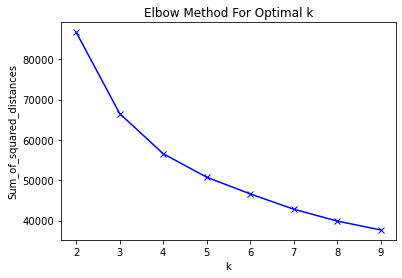

In [17]:
# find optimal number of clusters - elbow method
%matplotlib inline
Sum_of_squared_distances = []
K = range(2, 10, 1)
for k in K:
    data = deepcopy(pca09_result)
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
# clustering
n_clusters = 8
data = deepcopy(pca09_result)
km = KMeans(n_clusters = n_clusters) 
km.fit(data)
print('K-Means Inertia: {} (the smaller the better):'.format(km.inertia_))

K-Means Inertia: 39871.11320898087 (the smaller the better):


This says 3 or 4 clusters. The Silhouette method (see Appendix) says 3, 4, and maybe 8 clusters would be reasonable
* Try visualizing clusters per TVDSS in each well
* Hyperparameter tuning?
* Try different feature combinations?

## Visualize with PCA
* https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b (good code examples)  
* https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1 (code not as good, but good explanation of what tSNE does)

In [19]:
# 2D plot;    may be useful: km.labels_, km.cluster_centers_
def plot_2d_pca(data, labels, prev_pca):
    
    # dimensionality reduction
    n_clust = len(set(labels.tolist()))
    pca_2 = PCA(2)
    projected = pca_2.fit_transform(data)
    print('PCA_1 vs. orig. Explained variance:', sum(prev_pca.explained_variance_ratio_))
    print('PCA_2 vs. PCA_1 Explained variance:', sum(pca_2.explained_variance_ratio_))
   
    # plotting
    plt.figure(figsize=(10,5))
    sns.scatterplot(
        x='pc_1', y='pc_2', hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=pd.DataFrame(projected, columns=['pc_1', 'pc_2']),
        style=labels,
        legend="full",
        alpha=0.5
    )
    plt.title('PCA 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    plt.tight_layout(pad=0)

In [20]:
# 3D plot
def plot_3d_pca(data, labels, prev_pca):
        
    # dimensionality reduction
    n_clust = len(set(labels.tolist()))
    pca_3 = PCA(3)
    projected = pd.DataFrame(pca_3.fit_transform(data), columns=['pc_1', 'pc_2', 'pc_3'])
    print('PCA_1 vs. orig. Explained variance:', sum(prev_pca.explained_variance_ratio_))
    print('PCA_2 vs. PCA_1 Explained variance:', sum(pca_2.explained_variance_ratio_))
    
    # plotting
    ax = plt.figure(figsize=(10,5)).gca(projection='3d')
    ax.scatter(
        xs=projected['pc_1'], 
        ys=projected['pc_2'], 
        zs=projected['pc_3'], 
        c=labels, 
        cmap='tab10'
    )
    ax.set_xlabel('pc_1')
    ax.set_ylabel('pc_2')
    ax.set_zlabel('pc_3')
    plt.title('PCA 3D Visualization, K-Means w/{} clusters'.format(n_clust))
    plt.tight_layout(pad=0)
    plt.show()

PCA_1 vs. orig. Explained variance: 0.912679238268178
PCA_2 vs. PCA_1 Explained variance: 0.743579317432675


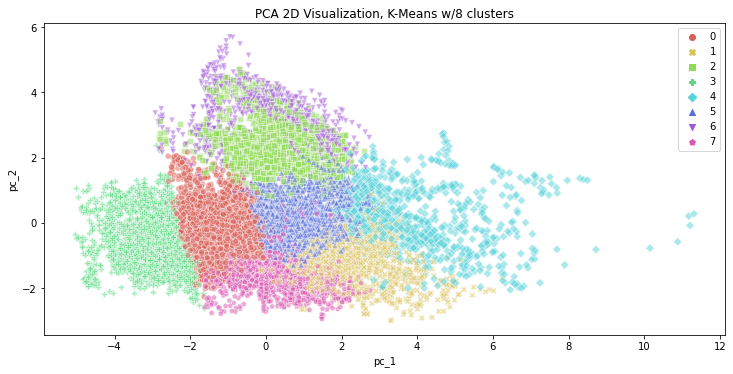

In [21]:
%matplotlib inline
plot_2d_pca(data = data, labels = km.labels_, prev_pca = pca)

PCA_1 vs. orig. Explained variance: 0.912679238268178
PCA_2 vs. PCA_1 Explained variance: 0.6786494050264252


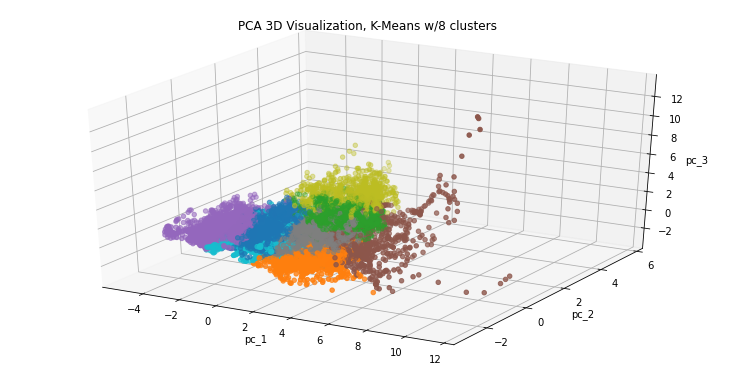

In [22]:
#%matplotlib notebook
%matplotlib inline
plot_3d_pca(data = data, labels = km.labels_, prev_pca = pca)

## Visualize with t-SNE

In [31]:
# tSNE takes time, so it should be done once outside of visualization functions
# 2-component tSNE
data_tsne = deepcopy(pca09_result)
time_start = time.time()
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, n_jobs=-1)
tsne2_results = tsne2.fit_transform(data_tsne)

data_tsne['tsne2_1'] = tsne2_results[:,0]
data_tsne['tsne2_2'] = tsne2_results[:,1]
print('2-component t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne2_results = None

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14273 samples in 0.020s...
[t-SNE] Computed neighbors for 14273 samples in 0.490s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14273
[t-SNE] Computed conditional probabilities for sample 2000 / 14273
[t-SNE] Computed conditional probabilities for sample 3000 / 14273
[t-SNE] Computed conditional probabilities for sample 4000 / 14273
[t-SNE] Computed conditional probabilities for sample 5000 / 14273
[t-SNE] Computed conditional probabilities for sample 6000 / 14273
[t-SNE] Computed conditional probabilities for sample 7000 / 14273
[t-SNE] Computed conditional probabilities for sample 8000 / 14273
[t-SNE] Computed conditional probabilities for sample 9000 / 14273
[t-SNE] Computed conditional probabilities for sample 10000 / 14273
[t-SNE] Computed conditional probabilities for sample 11000 / 14273
[t-SNE] Computed conditional probabilities for sample 12000 / 14273
[t-SNE] Computed conditional probabilities for sa

In [32]:
# 3-component tSNE
time_start = time.time()
tsne3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, n_jobs=-1)
tsne3_results = tsne3.fit_transform(data_tsne)

data_tsne['tsne3_1'] = tsne3_results[:,0]
data_tsne['tsne3_2'] = tsne3_results[:,1]
data_tsne['tsne3_3'] = tsne3_results[:,2]
print('3-component t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne3_results = None

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14273 samples in 0.024s...
[t-SNE] Computed neighbors for 14273 samples in 0.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14273
[t-SNE] Computed conditional probabilities for sample 2000 / 14273
[t-SNE] Computed conditional probabilities for sample 3000 / 14273
[t-SNE] Computed conditional probabilities for sample 4000 / 14273
[t-SNE] Computed conditional probabilities for sample 5000 / 14273
[t-SNE] Computed conditional probabilities for sample 6000 / 14273
[t-SNE] Computed conditional probabilities for sample 7000 / 14273
[t-SNE] Computed conditional probabilities for sample 8000 / 14273
[t-SNE] Computed conditional probabilities for sample 9000 / 14273
[t-SNE] Computed conditional probabilities for sample 10000 / 14273
[t-SNE] Computed conditional probabilities for sample 11000 / 14273
[t-SNE] Computed conditional probabilities for sample 12000 / 14273
[t-SNE] Computed conditional probabilities for sa

## 2D tSNE

In [35]:
# 2D plot;    may be useful: km.labels_, km.cluster_centers_
#%matplotlib inline
def plot_2d_tsne(data, labels):
        
    n_clust = len(set(km.labels_))
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=data.columns[0], y=data.columns[1], hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=data,
        style=labels,
        legend="full",
        alpha=0.5
    )
    plt.title('tSNE 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    plt.tight_layout(pad=0)

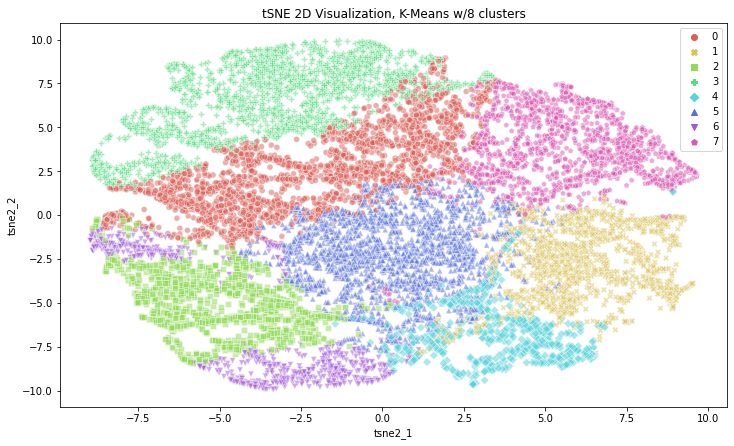

In [36]:
plot_2d_tsne(data_tsne[['tsne2_1', 'tsne2_2']], km.labels_)

## 2D PCA and tSNE side by side

In [45]:
# 2D PCA and tSNE side by side
def plot_2D_pca_tsne(data_all, data_tsne_local, labels):
        
    # do PCA
    pca_2 = PCA(2)
    projected = pca_2.fit_transform(data)
    df_poj = pd.DataFrame(projected, columns=['pc_1', 'pc_2'])

    # plot PCA & tSNE
    n_clust = len(set(labels))
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot(2, 1, 1)
    ax1.set_title('PCA 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    sns.scatterplot(
        x="pc_1", y="pc_2",
        hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=df_poj,
        legend="full",
        alpha=0.3,
        ax=ax1
    )
    ax2 = plt.subplot(2, 1, 2)
    ax2.set_title('tSNE 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    sns.scatterplot(
        x="tsne2_1", y="tsne2_2",
        hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=data_tsne_local,
        legend="full",
        alpha=0.3,
        ax=ax2
    )
    plt.tight_layout()

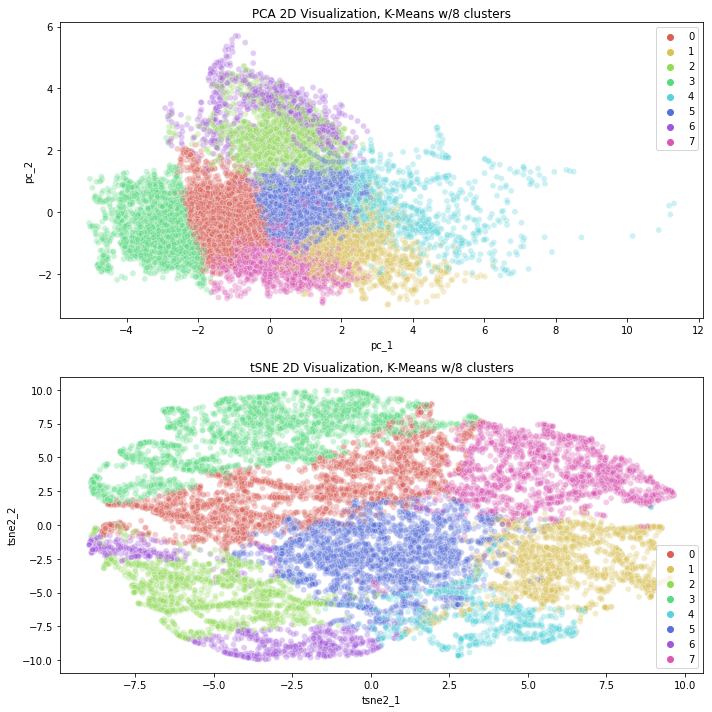

In [46]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], km.labels_)

## 3D tSNE

In [49]:
%matplotlib inline
def plot_3d_tsne(data, labels):
    
    # plotting (refresh kernel for %matplotlib notebook)
    ax = plt.figure(figsize=(10,5)).gca(projection='3d')
    ax.scatter(
        xs=data['tsne3_1'], 
        ys=data['tsne3_2'], 
        zs=data['tsne3_3'], 
        c=labels, 
        cmap='tab10'
    )
    ax.set_xlabel('tsne3_1')
    ax.set_ylabel('tsne3_2')
    ax.set_zlabel('tsne3_3')
    plt.tight_layout(pad=0)
    plt.show()

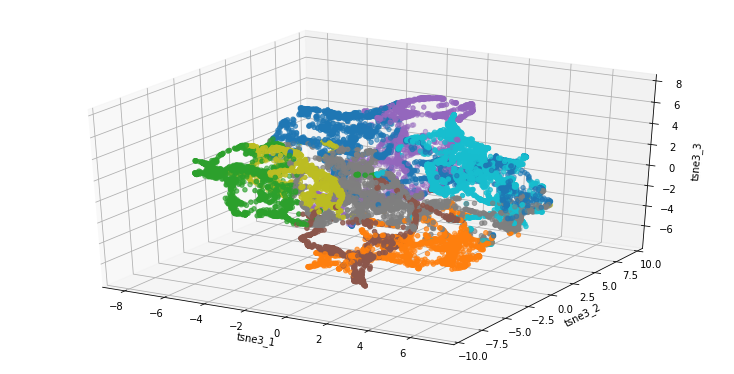

In [50]:
plot_3d_tsne(data_tsne[['tsne3_1', 'tsne3_2', 'tsne3_3']], km.labels_)

## Visualize which intervals in individual wells were clustered together
__Repeat clustering for each individual well?!__

In [53]:
df['clusters'] = km.labels_
wells = df['Well name'].unique().tolist()
print('Unique wells in the dataset:', wells)

Unique wells in the dataset: ['MC348-3ST1', 'MC391-1', 'MC392-1', 'MC392-1ST1', 'MC393-1', 'MC525-2', 'MC612-1BP1']


In [236]:
# options for sns.set(style = 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
def plot_well(df, well_name):
        
    temp = df[df['Well name'] == well_name][['TVDSS, ft', 'clusters']]             # rows only for one well
        
    clusters = sorted(temp['clusters'].unique().tolist())                          # ensure the same color matches each cluster
    sns.set_palette('hls', 8)
    colors = itertools.cycle(sns.color_palette())                                  # cannot access individual sns colors
    palette = []                                                                   # directly - need to cycle through them
    for idx, item in enumerate(clusters):                                          # some wells don't have all clusters
        if idx == 0:                                                               # => need to skip some colors in the cycle
            palette.append(next(colors))
        else:
            diff = clusters[idx] - clusters[idx-1]
            for i in range(diff):
                this_color = next(colors)
            palette.append(this_color)
                        
    n_clust = len(clusters)                                                        # num of clusters/colors for color pallette
    segment_length = (temp['TVDSS, ft'].max() - temp['TVDSS, ft'].min()) / 25      # regulating frequency of x ticks
        
    plt.figure(figsize=(21,3))
    sns.set(font_scale=1.5)
        
    ax = sns.scatterplot(
        x='TVDSS, ft', y=1, hue='clusters',
        palette=sns.color_palette(palette, len(clusters)),    # "hls"
        data=temp,
        s=55000,
        alpha=0.5,
        marker='s',
        legend='brief'
    )
    plt.setp(ax.get_legend().get_texts(), fontsize='8')                             # legend text font size
    plt.setp(ax.get_legend().get_title(), fontsize='11')                            # legend title font size
    plt.legend(loc='upper right')                                                   # legend position
        
    plt.title('Well {}, datapoints: {}'.format(well_name, temp.shape[0]))
    plt.xticks(np.arange(temp['TVDSS, ft'].min(), temp['TVDSS, ft'].max(), segment_length), rotation=90)
    plt.yticks([])
        
    plt.tight_layout(pad=0)

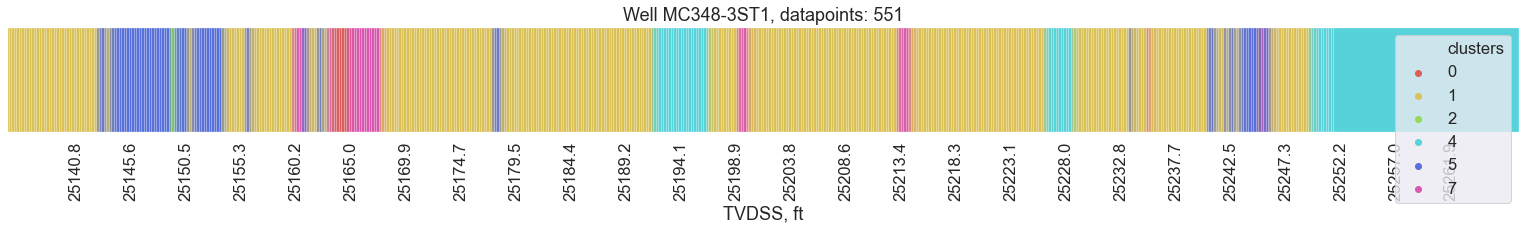

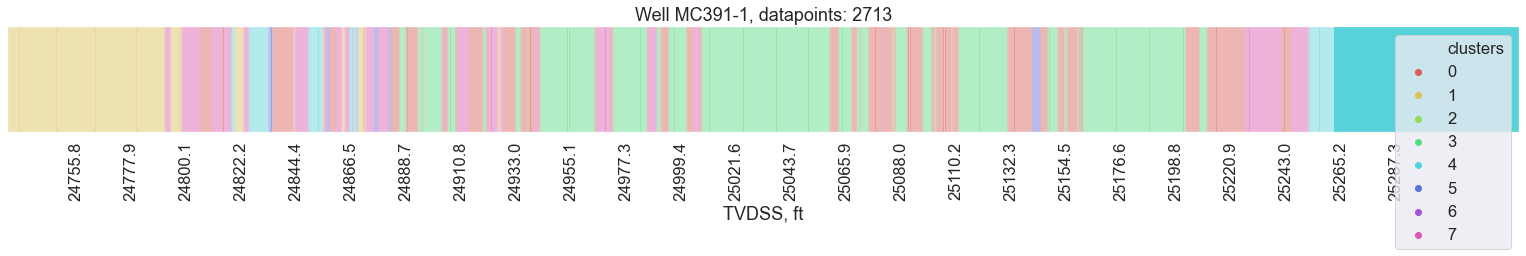

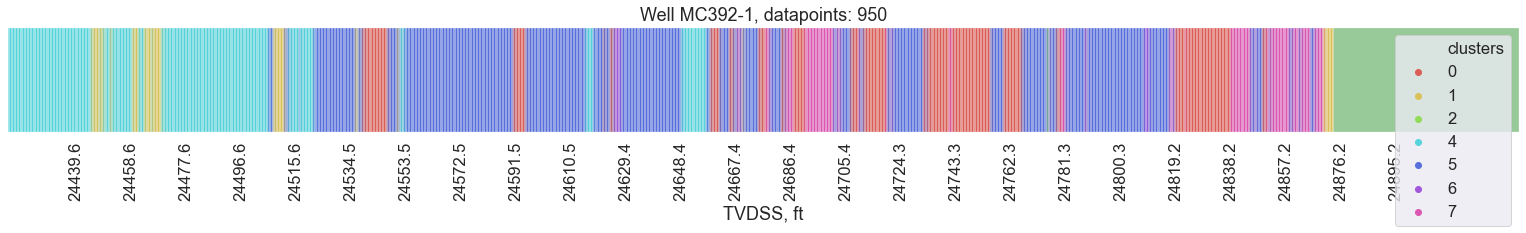

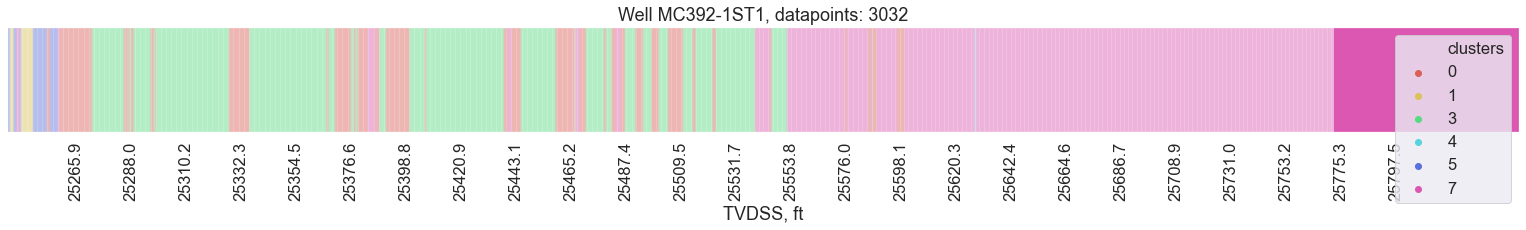

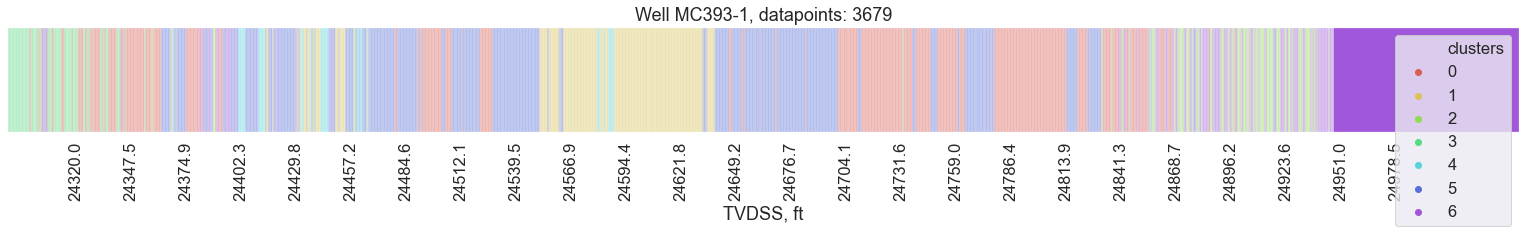

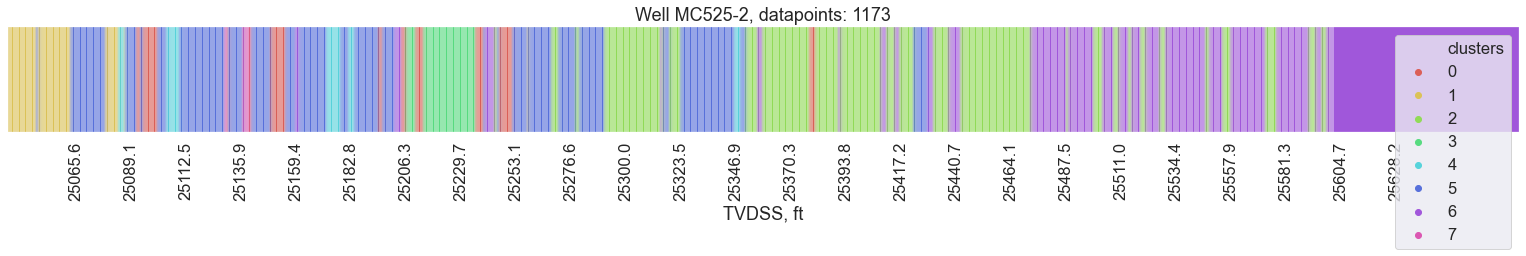

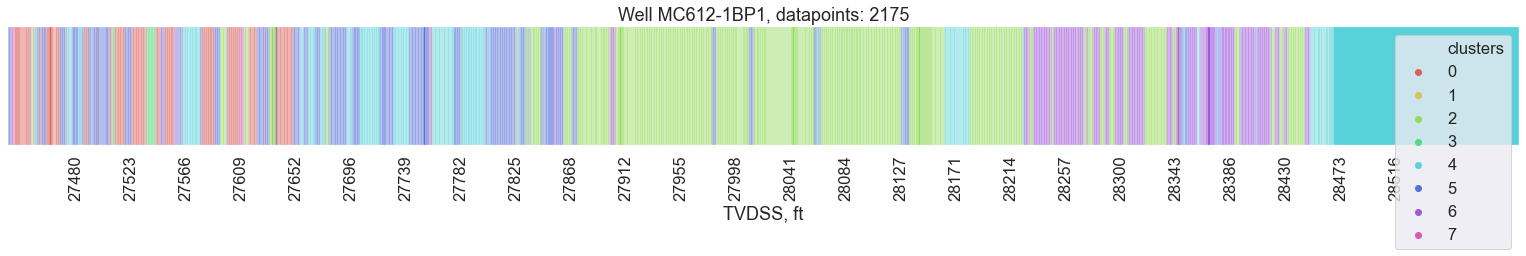

In [237]:
for well in wells:
    plot_well(df, well)

## Next Ideas

In [ ]:
# second idea: EM = my hw + Data Science book on kmeans

In [ ]:
# third idea = regressor for NMR_FF? w/careful feature selection?
# But not for TVDSS for sure as clustering results show that the same facies may occur at different depths

In [ ]:
# fourth idea - remove noise, then create a regressor for a) TVDSS, b) NMR_FF? Maybe don't use all the features?
pca = PCA(0.50).fit(noisy)
print(pca.n_components_)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
df_filtered = pd.DataFrame(filtered)
df_filtered.head()

## Silhouette method for estimating best number of clusters

In [ ]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

print(__doc__)

# Generating the sample data from make_blobs: one distinct cluster and 3 clusters placed close together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

pca_local = PCA(2)
X = deepcopy(df[corr_features])
X = pca_local.fit_transform(X)

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 18, 20, 25, 30]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(21, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clustering visualized")
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")

    plt.suptitle("Silhouette analysis for PCA(2)/KMeans, clusters = {}, silhouette score = {}".format(n_clusters, silhouette_avg),
                 fontsize=21, fontweight='bold')

plt.show()
X = None

## Appendix (irrelevant)

### Another way to apply tSNE - PCA first to reduce features (much faster than tSNE on hundreds of features)

In [ ]:
# PCA first, then tSNE - for a large number of features, but do I raelly need it here? I don't think so
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
# then do tSNE on pca_result_50

### Plot multi-colored line (matplotlib)

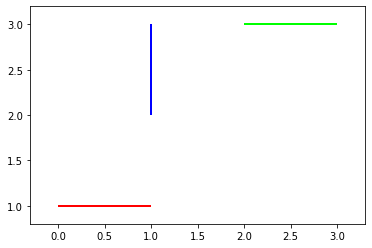

In [79]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

### 2D as Matplotlib visualization (sns is better)

In [ ]:
# 2D plot, matplotlib (no sns)
def plot_2d(data, prev_pca):
      
    # dimensionality reduction
    pca_2 = PCA(2)
    projected = pca_2.fit_transform(data)
    print('PCA_1 vs. orig. Explained variance:', sum(prev_pca.explained_variance_ratio_))
    print('PCA_2 vs. PCA_1 Explained variance:', sum(pca_2.explained_variance_ratio_))
    
    # plotting
    plt.figure(figsize=(15,10))
    plt.scatter(projected[:, 0], projected[:, 1], c=km.labels_, edgecolor='none', alpha=0.3,
                cmap=plt.cm.get_cmap('rainbow', 7))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()